In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

CC cet is a magnetic PCEB. How magnetic?

In [3]:
spectra = glob.glob('../hst_spectra/*CET*')
spectra

['../hst_spectra/V-CC-CET_COS_FUV_G130M_2018-02-01:23:50:55_ldlc01xkq.dat',
 '../hst_spectra/V-CC-CET_COS_FUV_G130M_2018-07-22:05:40:51_ldlc51p5q.dat']

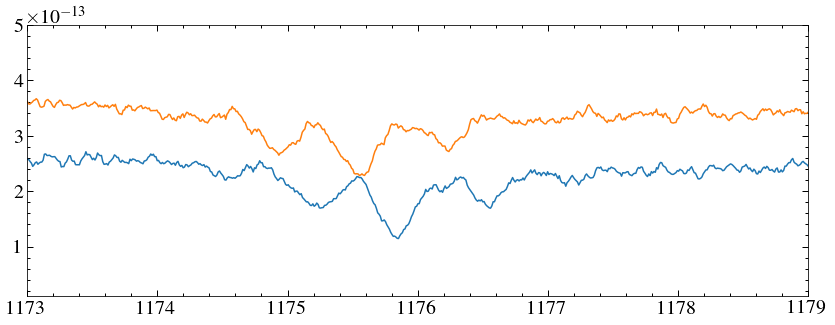

In [13]:
smooth=5
for i,s in enumerate(spectra):
    w, f, e, dq = np.loadtxt(s, unpack=True)
    w, f, e = w[dq==0], f[dq==0], e[dq==0]
    f = convolve(f,Box1DKernel(smooth))
    e = convolve(e,Box1DKernel(smooth))/smooth**0.5
    plt.plot(w,f+i*1e-13)
    plt.ylim(0.1e-13, 0.5e-12)
    plt.xlim(1173, 1179)

Need to do magnetic line id in seperate window.

In [ ]:
useful_lines = [] 